In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import warnings
from ipywidgets import *
warnings.filterwarnings("ignore")
plt.style.use('ggplot')


In [4]:
df = pd.read_csv('./data/data_preprocessed.csv')

In [5]:
df.isnull().mean() * 100

title                    0.000000
casts                    7.848955
directors                7.664644
writers                 11.566644
genres                   7.974826
certificate             60.058440
countries_of_origin      5.331535
languages                6.194650
production_companies    15.068555
sound_mix               71.526186
aspect_ratio            48.545741
color                    9.314453
budget                  71.714992
runtime                 10.159586
release_date             0.359631
score                    8.770510
votes                    0.000000
user_reviews             0.000000
critic_reviews           0.000000
metascore               76.754327
gross_worldwide          0.000000
dtype: float64

In [6]:
df.shape

(22245, 21)

In [7]:
df.isnull().mean() * 100

title                    0.000000
casts                    7.848955
directors                7.664644
writers                 11.566644
genres                   7.974826
certificate             60.058440
countries_of_origin      5.331535
languages                6.194650
production_companies    15.068555
sound_mix               71.526186
aspect_ratio            48.545741
color                    9.314453
budget                  71.714992
runtime                 10.159586
release_date             0.359631
score                    8.770510
votes                    0.000000
user_reviews             0.000000
critic_reviews           0.000000
metascore               76.754327
gross_worldwide          0.000000
dtype: float64

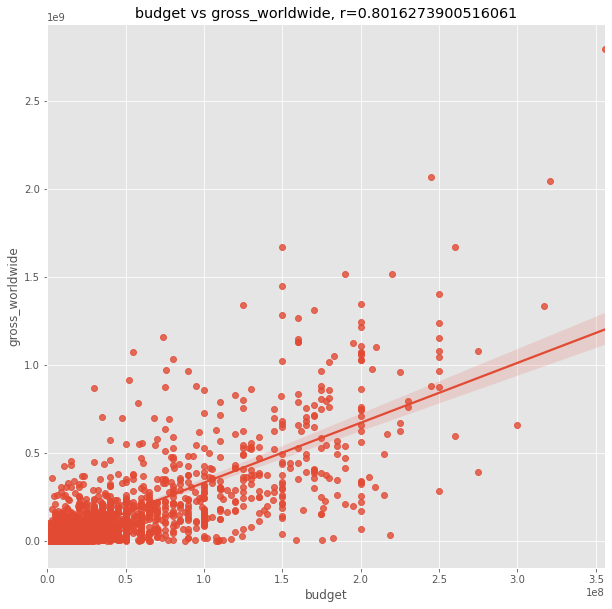

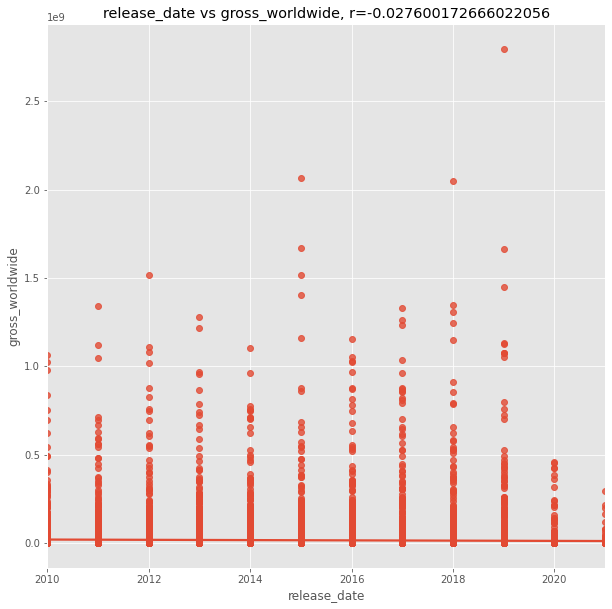

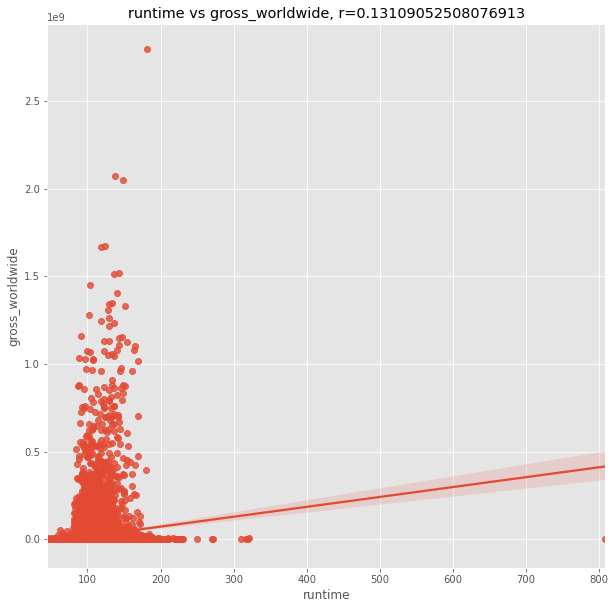

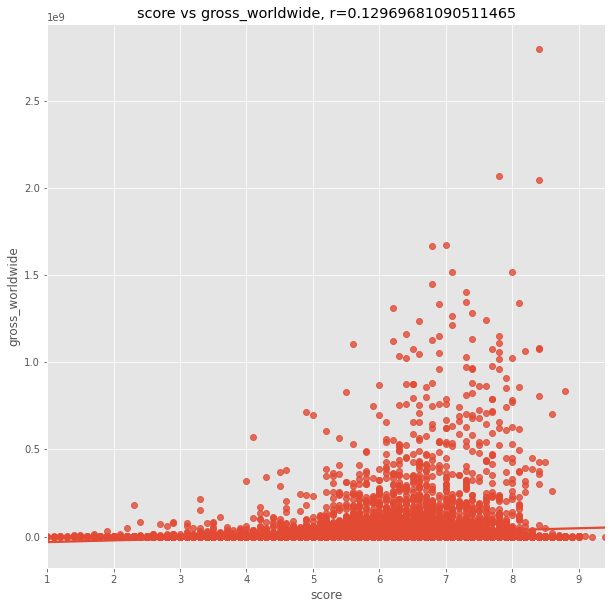

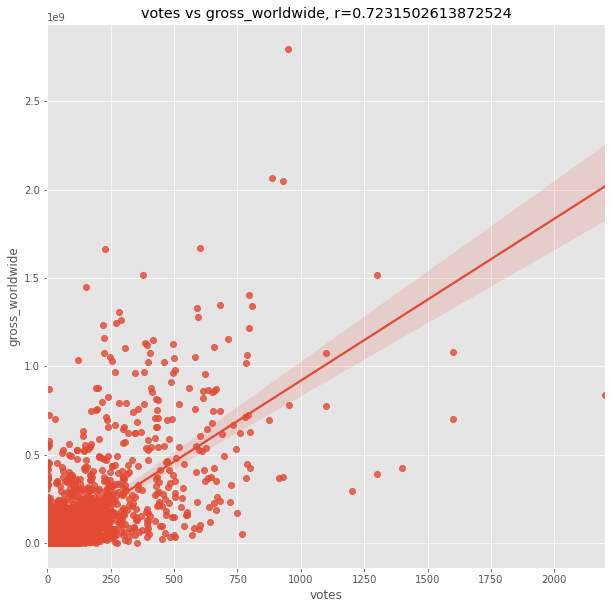

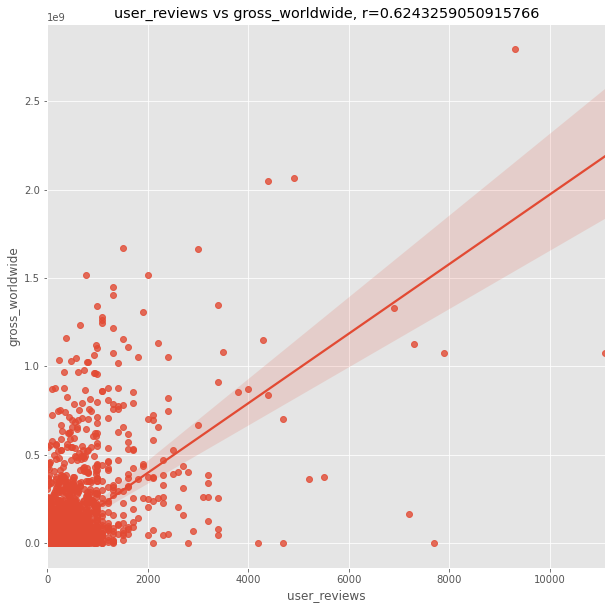

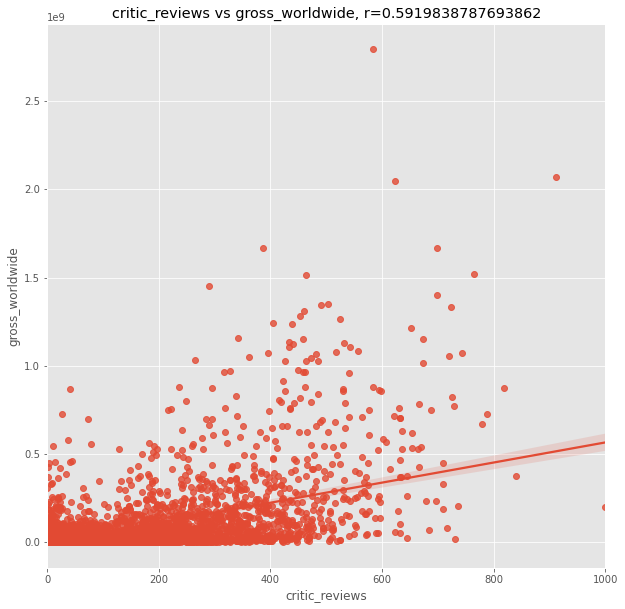

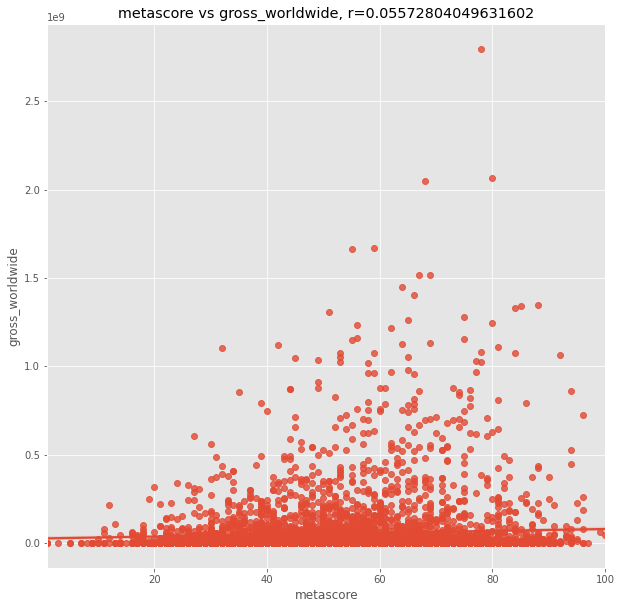

In [8]:
features = ['budget', 'release_date', 'runtime', 'score', 'votes', 'user_reviews', 'critic_reviews', 'metascore']

for feature in features:
    plt.figure(figsize=(10, 10))
    sns.regplot(x=feature, y='gross_worldwide', data = df)
    plt.title(f"{feature} vs gross_worldwide, r={df.corr()['gross_worldwide'][feature]}")
    plt.savefig(f'./graphs/don_bien/{feature}_vs_gross_worldwide', transparent=False)
    plt.show()

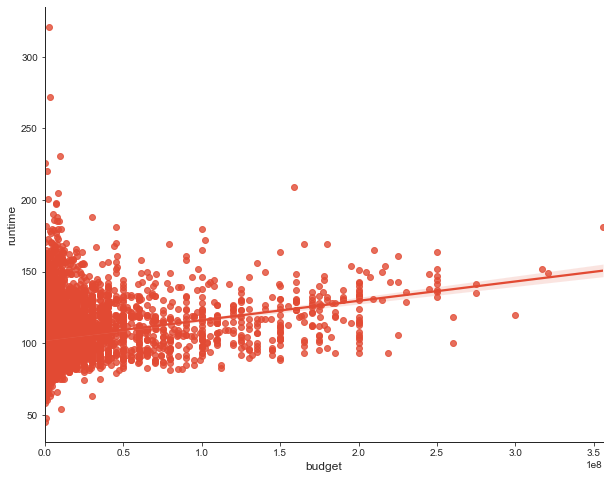

In [9]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
sns.regplot(y="runtime", x="budget", data=df, ax=ax)
sns.despine()

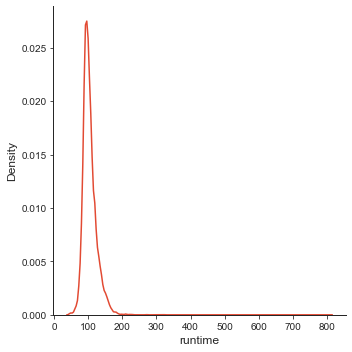

In [10]:
sns.displot(x=df['runtime'], kind="kde", label='Distribution of movie runtime', ax='Runtime')

22


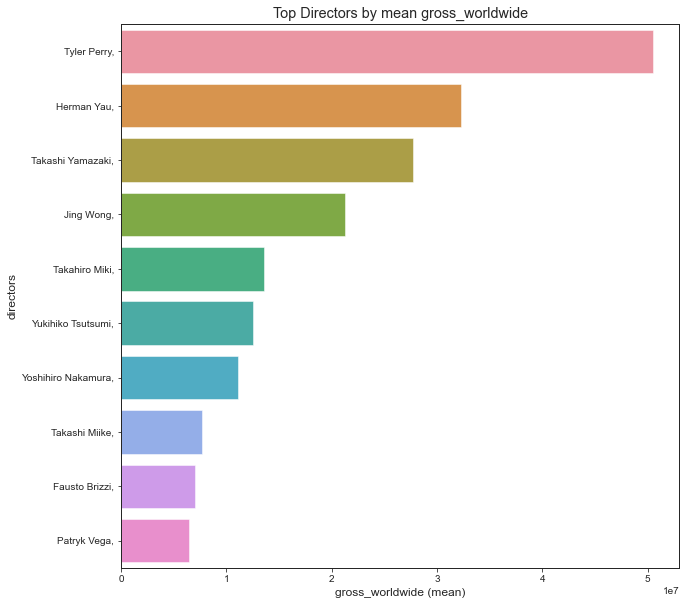

In [11]:
plt.figure(figsize=(10, 10))
vc = df.directors.value_counts()
listD = vc[vc.values > 10].index
top_gross = df[df.directors.isin(listD)].groupby('directors', as_index=False)['gross_worldwide'].mean()
top_gross_sorted = top_gross.sort_values('gross_worldwide', ascending=False)
print(top_gross_sorted.shape[0])
sns.barplot(y='directors', x='gross_worldwide', data=top_gross_sorted.head(10))
plt.xlabel('gross_worldwide (mean)')
plt.title('Top Directors by mean gross_worldwide')
plt.savefig('./graphs/don_bien/top10_director_by_agross')
plt.show()

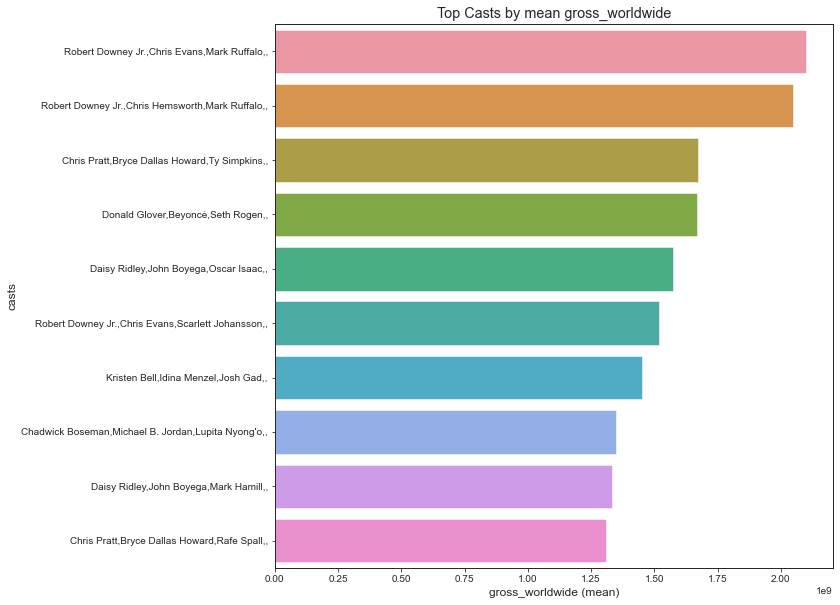

In [12]:
plt.figure(figsize=(10, 10))
top_gross = df.groupby('casts', as_index=False)['gross_worldwide'].mean()
top_gross_sorted = top_gross.sort_values('gross_worldwide', ascending=False)
sns.barplot(y='casts', x='gross_worldwide', data=top_gross_sorted.head(10))
plt.xlabel('gross_worldwide (mean)')
plt.title('Top Casts by mean gross_worldwide')
plt.savefig('./graphs/don_bien/top10_cast_by_agross')
plt.show()

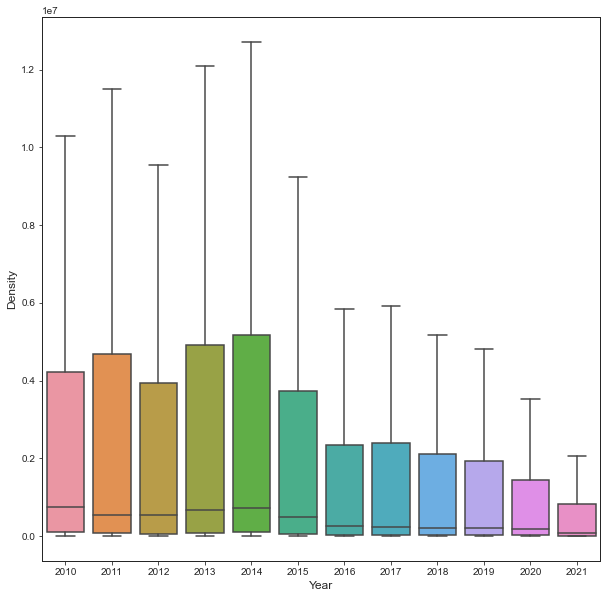

In [13]:
plt.figure(figsize=(10, 10))
sns.boxplot(y=df["gross_worldwide"], x=df["release_date"],
            showfliers=False, order=[x for x in range(2010, 2022)])
plt.xlabel('Year')
plt.ylabel('Density') 

plt.show()

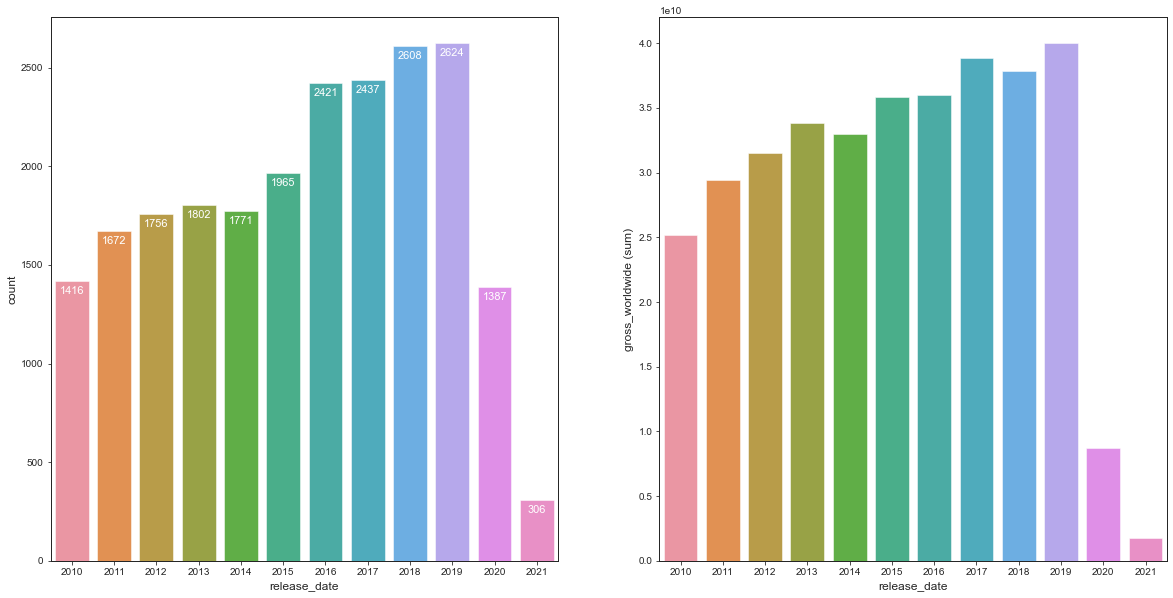

In [14]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(20, 10)) 
sns.countplot(x="release_date", data=df, order=[x for x in range(2010, 2022)], ax=ax[0])
temp = df.groupby('release_date', as_index=False)['gross_worldwide'].sum()
sns.barplot(x='release_date', y='gross_worldwide', data=temp, order=[x for x in range(2010, 2022)], ax=ax[1])  
ax[1].set_ylabel('gross_worldwide (sum)') 
for p in ax[0].patches:
    ax[0].annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='white', xytext=(0, -10),
                textcoords='offset points')

In [15]:
temp = df.groupby('release_date', as_index=False)['gross_worldwide'].sum()
temp['count'] = df.release_date.value_counts().sort_index().values 
temp

,release_date,gross_worldwide,count
0,2010.0,2.518641e+10,1416
1,2011.0,2.941430e+10,1672
2,2012.0,3.155421e+10,1756
3,2013.0,3.380230e+10,1802
4,2014.0,3.300813e+10,1771
5,2015.0,3.586543e+10,1965
6,2016.0,3.596765e+10,2421
7,2017.0,3.883719e+10,2437
8,2018.0,3.786849e+10,2608
9,2019.0,4.001508e+10,2624


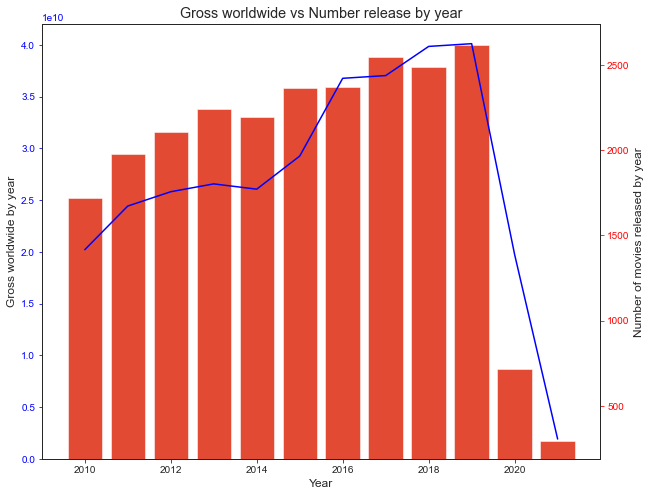

In [20]:
fig, bar_ax = plt.subplots(figsize=(10,8))
bar_ax.bar(temp['release_date'], temp['gross_worldwide'])  # plot first y series (line)
bar_ax.set_title('Gross worldwide vs Number release by year')
bar_ax.set_xlabel('Year')  # label for x axis
bar_ax.set_ylabel('Gross worldwide by year')  # label for left y axis
bar_ax.tick_params('y', colors='blue')  # add color to left y axis     

line_ax = bar_ax.twinx()
line_ax.plot(temp['release_date'], temp['count'], color='blue')  # plot second y series (bar)
line_ax.set_ylabel('Number of movies released by year')  # label for right y axis
line_ax.tick_params('y', colors='red')  # add color to right y axis

plt.show()

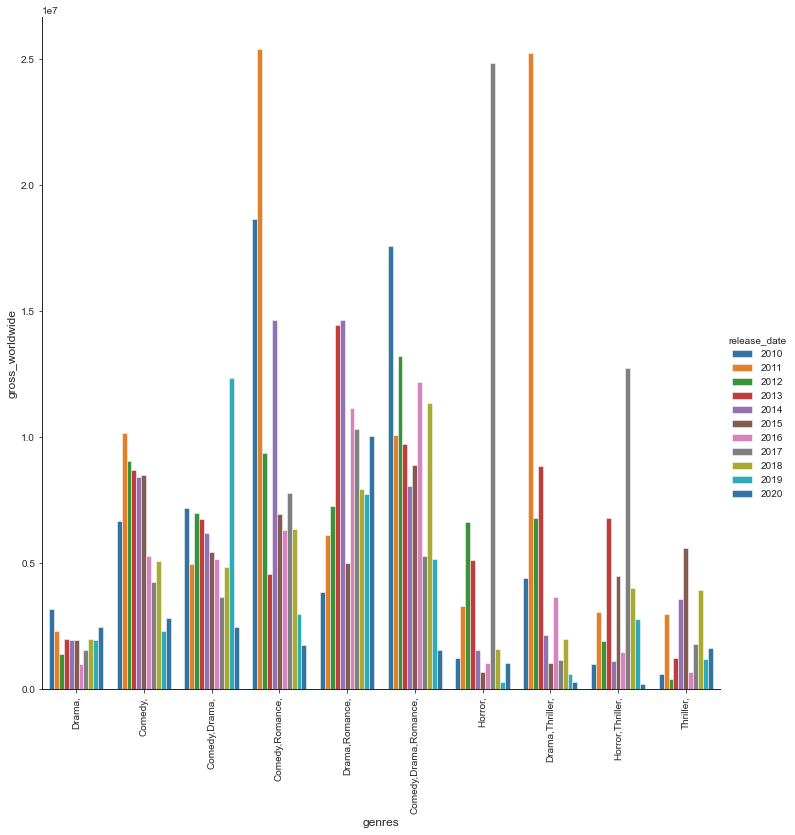

In [17]:
sns.catplot(x = "genres",       # x variable name
            y = "gross_worldwide",       # y variable name
            hue = "release_date",  # group variable name
            data = df,     # dataframe to plot
            order=df.genres.value_counts().index[0:10],
            hue_order=range(2010, 2021),
            height=10, 
            dodge=True,
            palette='tab10', 
            ci=None,
            kind = "bar")

plt.xticks(fontsize=10, rotation=90)  
plt.yticks(fontsize=10) 
plt.show()

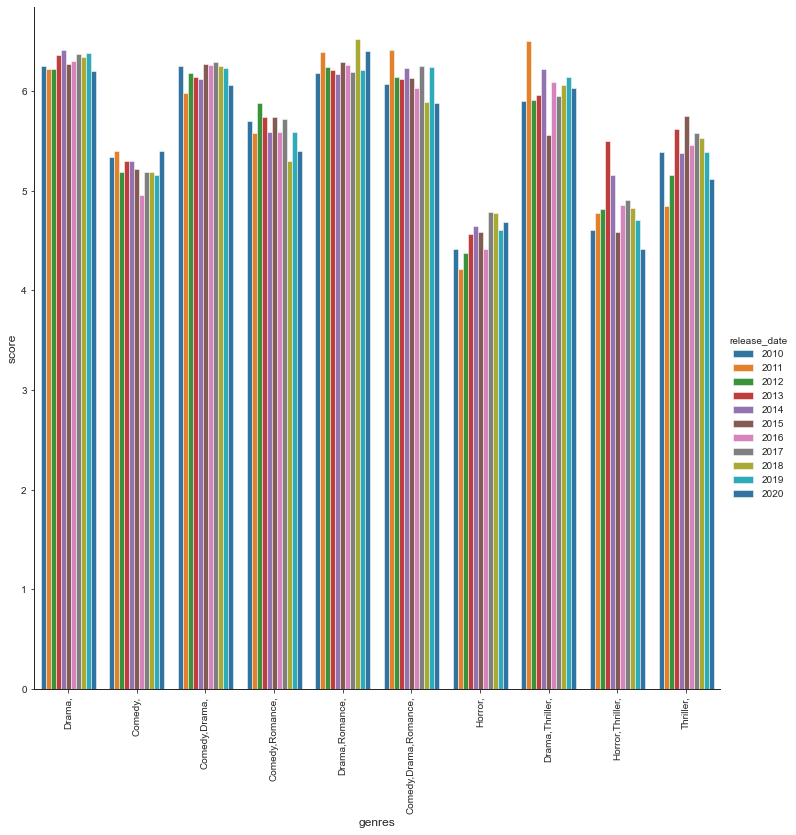

In [18]:
sns.catplot(x = "genres",       # x variable name
            y = "score",       # y variable name
            hue = "release_date",  # group variable name
            data = df,     # dataframe to plot
            order=df.genres.value_counts().index[0:10],
            hue_order=range(2010, 2021),
            height=10, 
            dodge=True,
            palette='tab10', 
            ci=None,
            kind = "bar")

plt.xticks(fontsize=10, rotation=90)  
plt.yticks(fontsize=10) 
plt.show()

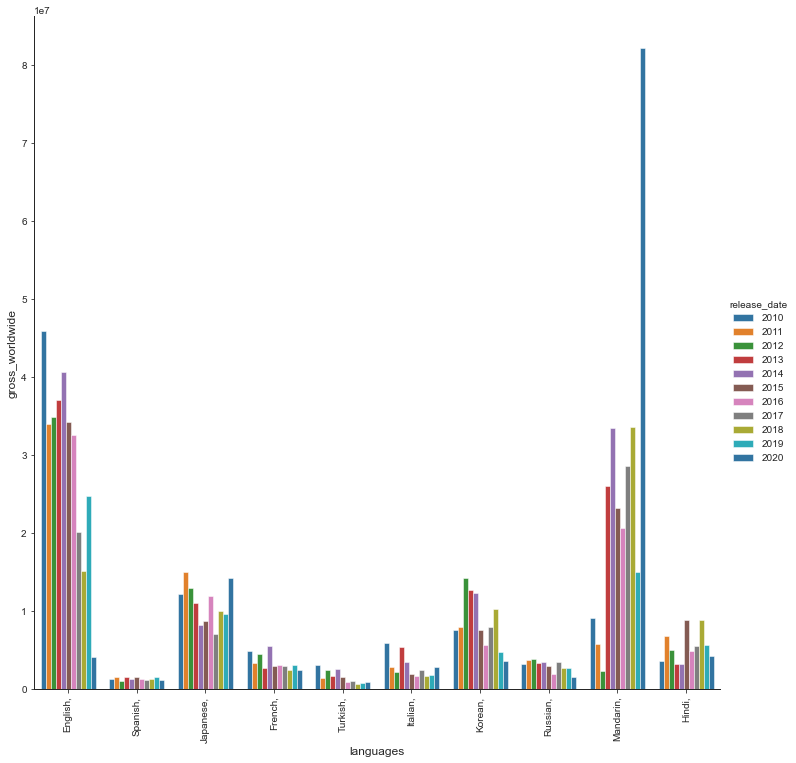

In [19]:
sns.catplot(x = "languages",       # x variable name
            y = "gross_worldwide",       # y variable name
            hue = "release_date",  # group variable name
            data = df,     # dataframe to plot
            order=df.languages.value_counts().index[0:10],
            hue_order=range(2010, 2021),
            height=10, 
            dodge=True,
            palette='tab10', 
            ci=None,
            kind = "bar")

plt.xticks(fontsize=10, rotation=90)  
plt.yticks(fontsize=10) 
plt.show()